#Importando data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from time import perf_counter
inicio=perf_counter()

In [2]:
datos = pd.read_csv('/content/consolidado_pruebas.csv')
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102681 entries, 0 to 102680
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   precio    102681 non-null  int64  
 1   uva       102681 non-null  float64
 2   dia       102681 non-null  int64  
 3   mes       102681 non-null  int64  
 4   ano       102681 non-null  int64  
 5   decena_1  102681 non-null  int64  
 6   decena_2  102681 non-null  int64  
 7   decena_3  102681 non-null  int64  
 8   tri_1     102681 non-null  int64  
 9   tri_2     102681 non-null  int64  
 10  tri_3     102681 non-null  int64  
 11  tri_4     102681 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 9.4 MB


In [3]:
#elimino las últimas filas que no quiero mosrarle para que entrene
indices_a_eliminar = datos.index[-40:]
df = datos.drop(indices_a_eliminar)
#y elimino las columnas que no necesito
df=df.drop(['dia','mes','ano'],axis=1)

#Análisis exploratorio

In [4]:
df.describe().round(2)

,precio,uva,decena_1,decena_2,decena_3,tri_1,tri_2,tri_3,tri_4
count,102641.00,102641.00,102641.00,102641.00,102641.00,102641.00,102641.00,102641.00,102641.00
mean,1256.66,1096.09,0.34,0.31,0.34,0.03,0.24,0.48,0.25
std,108.87,118.78,0.48,0.46,0.48,0.17,0.43,0.50,0.43
min,955.00,463.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1195.00,1039.88,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,1245.00,1111.58,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,1335.00,1185.22,1.00,1.00,1.00,0.00,0.00,1.00,1.00
max,1480.00,1258.89,1.00,1.00,1.00,1.00,1.00,1.00,1.00


<Axes: ylabel='precio'>

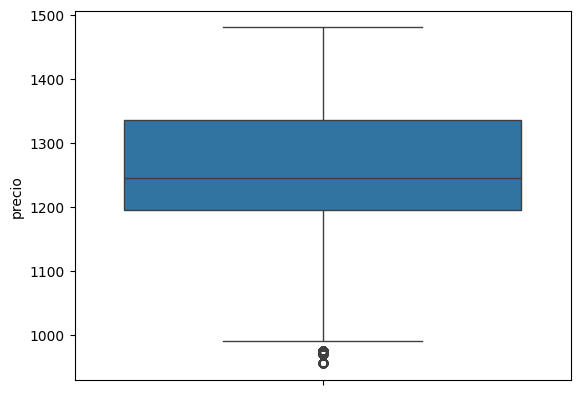

In [5]:
sns.boxplot(data=df['precio'])

In [6]:
df[df['precio'] < 1000]

,precio,uva,decena_1,decena_2,decena_3,tri_1,tri_2,tri_3,tri_4
10044,955,463.0,1,0,0,1,0,0,0
10048,975,716.0,0,1,0,1,0,0,0
10051,990,770.0,0,0,1,1,0,0,0
10052,975,786.0,1,0,0,0,1,0,0
10053,970,828.0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
102486,955,463.0,1,0,0,1,0,0,0
102490,975,716.0,0,1,0,1,0,0,0
102493,990,770.0,0,0,1,1,0,0,0
102494,975,786.0,1,0,0,0,1,0,0


In [7]:
#puedo eliminar data por debajo de 1000, que son 5 rows... ver esto...
#df=df[df.precio > 1000]

#Correlaciones

In [8]:
df.cov().round(2)

,precio,uva,decena_1,decena_2,decena_3,tri_1,tri_2,tri_3,tri_4
precio,11853.46,789.99,-5.42,1.13,4.29,-5.30,-10.48,37.99,-22.21
uva,789.99,14108.85,-1.29,3.10,-1.81,-12.64,-26.33,7.81,31.16
decena_1,-5.42,-1.29,0.23,-0.11,-0.12,0.00,-0.01,-0.01,0.02
decena_2,1.13,3.10,-0.11,0.21,-0.11,0.00,-0.01,0.01,0.00
decena_3,4.29,-1.81,-0.12,-0.11,0.23,-0.00,0.02,0.00,-0.02
tri_1,-5.30,-12.64,0.00,0.00,-0.00,0.03,-0.01,-0.01,-0.01
tri_2,-10.48,-26.33,-0.01,-0.01,0.02,-0.01,0.18,-0.12,-0.06
tri_3,37.99,7.81,-0.01,0.01,0.00,-0.01,-0.12,0.25,-0.12
tri_4,-22.21,31.16,0.02,0.00,-0.02,-0.01,-0.06,-0.12,0.19


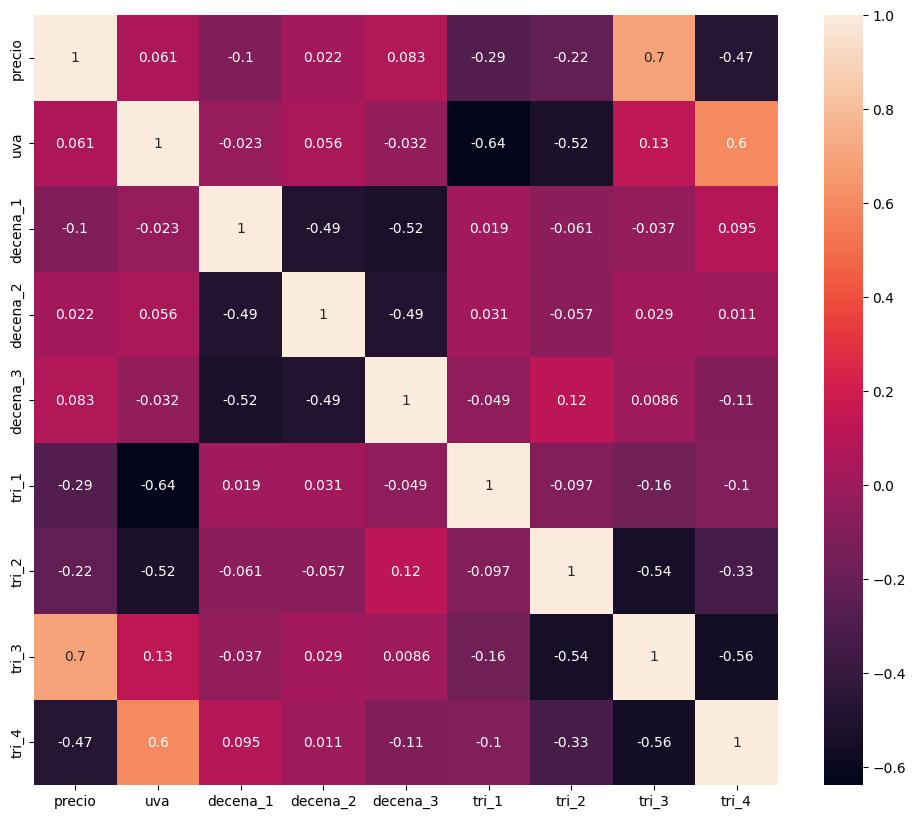

In [9]:
#ESTO ES PARA VER LA CORRELACION ENTRE LAS VARIABLES:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

#Escalamiento
* ver si es conveniente utilizar StandardScaler

* y me resulta conveniente ya quitar la dimension precio

In [10]:
#PRIMERO creo una copia y elimino la columna precio

df_a_scaled = df.copy()
df_a_scaled = df_a_scaled.drop('precio', axis=1)

In [11]:
from sklearn import preprocessing
# Crear una instancia de MinMaxScaler
scaler = preprocessing.MinMaxScaler()
# Ajustar el scaler a los datos
scaler.fit(df_a_scaled)

MinMaxScaler()

In [12]:
# Transformar los datos usando el scaler ajustado
df_scaled = scaler.transform(df_a_scaled)
# Convertir el ndarray escalado de nuevo a DataFrame
df_scaler = pd.DataFrame(df_scaled, columns=df_a_scaled.columns)

In [13]:
df_scaler

,uva,decena_1,decena_2,decena_3,tri_1,tri_2,tri_3,tri_4
0,0.077900,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.123133,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.272651,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.353064,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.374424,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
102636,0.915629,1.0,0.0,0.0,0.0,0.0,0.0,1.0
102637,0.921798,1.0,0.0,0.0,0.0,0.0,0.0,1.0
102638,0.923871,1.0,0.0,0.0,0.0,0.0,0.0,1.0
102639,0.925932,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [14]:
df_scaler.describe().round(2)

,uva,decena_1,decena_2,decena_3,tri_1,tri_2,tri_3,tri_4
count,102641.00,102641.00,102641.00,102641.00,102641.00,102641.00,102641.00,102641.00
mean,0.80,0.34,0.31,0.34,0.03,0.24,0.48,0.25
std,0.15,0.48,0.46,0.48,0.17,0.43,0.50,0.43
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.72,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.81,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.91,1.00,1.00,1.00,0.00,0.00,1.00,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


#PCA - análisis de componentes principales

In [15]:
#sns.pairplot(df_scaler)

In [16]:
from sklearn.decomposition import PCA

##Ahora tengo que evaluar con cuantas dimensiones optimizo mejor

In [17]:
#itero con las 8 dimensiones
lista=[]
for i in range(1,9):
  pca = PCA(n_components=i) #creo una instancia y le paso a cuantos componentes quiero reducir mi matriz
  pca.fit(df_scaler) #y que lo entrene con los datos escalados
  data=pd.DataFrame(pca.explained_variance_ratio_)
  lista.append(data[0].sum())


In [18]:
lista

[0.2782943352499833,
 0.544033255115576,
 0.7831392919742929,
 0.9644296040281538,
 0.998537028137154,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002]

<Axes: >

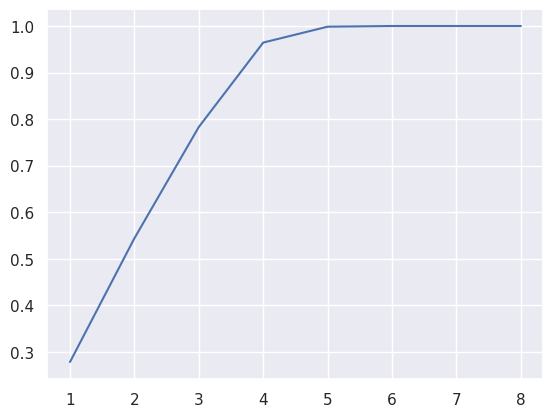

In [19]:
sns.set(style='darkgrid')
sns.lineplot(x=range(1,9),y=lista)

In [20]:
#Con 4 dimensiones esta por encima del 94.46%, tomamos esta opción.
pca = PCA(n_components=4) #creo una instancia y le paso a cuantos componentes quiero reducir mi matriz
# pca = PCA(n_components=0.95)  # Esto captura el 95% de la varianza
pca.fit(df_scaler) #y que lo entrene con los datos escalados

PCA(n_components=4)

In [21]:
#El PCA tiene varios metodos:
pca.explained_variance_ratio_
# el array obtenido: ([0.37320186, 0.28152698, 0.21422958, 0.09677119]) --> me dice las direcciones principales son estas, y que % de los datos capturan --> en este ejemplo son 4
# estamos por encima del 90% lo cual es decente

array([0.27829434, 0.26573892, 0.23910604, 0.18129031])

## Ahora rearmo el df

In [22]:
X_pca = pca.transform(df_scaler) #transformo el conjunto de datos escalado para obtener los componentes principales.

In [23]:
#Crear un nuevo DataFrame: Aunque los componentes no tienen nombres específicos, puedes crear un nuevo DataFrame y asignar nombres genéricos como PC1, PC2, etc.
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])]) # X_pca.shape[1] --> es la cantidad de columnas

In [24]:
df_pca['precio'] = df['precio'].values #le sumo la variable objetivo

In [25]:
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102641 entries, 0 to 102640
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   PC1     102641 non-null  float64
 1   PC2     102641 non-null  float64
 2   PC3     102641 non-null  float64
 3   PC4     102641 non-null  float64
 4   precio  102641 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 3.9 MB


In [26]:
df_pca.head(3)

,PC1,PC2,PC3,PC4,precio
0,0.101447,0.788288,-0.167810,0.106181,1205
1,-0.561792,-0.326542,-0.457768,-0.371743,1165
2,-0.563098,-0.335756,-0.454493,-0.340590,1020


# Modelo

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [28]:
X = df_pca.drop('precio', axis=1)  # Eliminar la columna 'precio'
y = df_pca['precio']  # La variable objetivo

In [29]:
# Divido los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
model = RandomForestRegressor(n_estimators=800, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=800, random_state=42)

##Testeo modelo

In [31]:
# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test).round(5)

In [32]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 4.609325802760776


In [33]:
mse**0.5

2.1469340471380987

##Validacion cruzada

In [34]:
#VALIDACION CRUZADA
from sklearn.model_selection import cross_val_score #para realizar validacion cruzada
val_cruz_lr=cross_val_score(model, X_train, y_train, cv=5)#.mean().round(5)
print(f'El resultado de validacion cruzada de lr es: {val_cruz_lr}')

El resultado de validacion cruzada de lr es: [0.99958492 0.99959183 0.99962824 0.99962659 0.99955998]


#Rearmado del df con todas las predicciones

In [35]:
#Armo el df con la prediccion en cada instancia:
df['precio_lr'] = model.predict(X)
df['diferencia']=df['precio']-df['precio_lr'] #genero la variable diferencia
df['abs_dif_lr']=abs(df['diferencia']) #tomo el valor absoluto de la diferencia
df['desvio%_lr']=df['abs_dif_lr']/df['precio'] #para luego generar la diferencia %
df=df.drop(['diferencia'],axis=1) #elimino la variable diferencia que ya no la uso porque tengo el abs

# Análisis de resultados

In [36]:
df[['precio','precio_lr']]

,precio,precio_lr
0,1205,1205.0
1,1165,1165.0
2,1020,1020.0
3,1000,1000.0
4,1000,1000.0
...,...,...
102636,1175,1175.0
102637,1165,1165.0
102638,1155,1155.0
102639,1155,1155.0


In [37]:
df.describe().round(2)

,precio,uva,decena_1,decena_2,decena_3,tri_1,tri_2,tri_3,tri_4,precio_lr,abs_dif_lr,desvio%_lr
count,102641.00,102641.00,102641.00,102641.00,102641.00,102641.00,102641.00,102641.00,102641.00,102641.00,102641.00,102641.00
mean,1256.66,1096.09,0.34,0.31,0.34,0.03,0.24,0.48,0.25,1256.66,0.44,0.00
std,108.87,118.78,0.48,0.46,0.48,0.17,0.43,0.50,0.43,108.85,2.13,0.00
min,955.00,463.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,955.00,0.00,0.00
25%,1195.00,1039.88,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1195.00,0.00,0.00
50%,1245.00,1111.58,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1245.00,0.00,0.00
75%,1335.00,1185.22,1.00,1.00,1.00,0.00,0.00,1.00,1.00,1335.00,0.00,0.00
max,1480.00,1258.89,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1480.00,15.07,0.01


In [38]:
from sklearn.metrics import max_error
max_error(df['precio'], df['precio_lr'])

15.065211636462436

In [39]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(df['precio'], df['precio_lr'])

0.4426864420713876

In [40]:
from sklearn.metrics import mean_squared_error
mean_squared_error(df['precio'], df['precio_lr'])

4.717051207213486

In [41]:
mean_squared_error(df['precio'], df['precio_lr'],squared=False) #rmse

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


2.1718773462637078

In [42]:
mean_squared_error(df['precio'], df['precio_lr'])*(len(df['precio_lr'])) #Suma de los cuadrados de los residuos (RSS)

484162.8529595994

In [43]:
from sklearn.metrics import r2_score
r2_score(df['precio'], df['precio_lr']) # coeficiente de determinacion, indica que es un buen modelo en general arriba de 75% , excelente arriba de los 80%
## y casi perfecto por arriba de los 90%
### 100% es que todos los valores son predichos exactos, y es bueno evaluar si esta sobreajustado.

0.9996020489203961

#Graficas finales

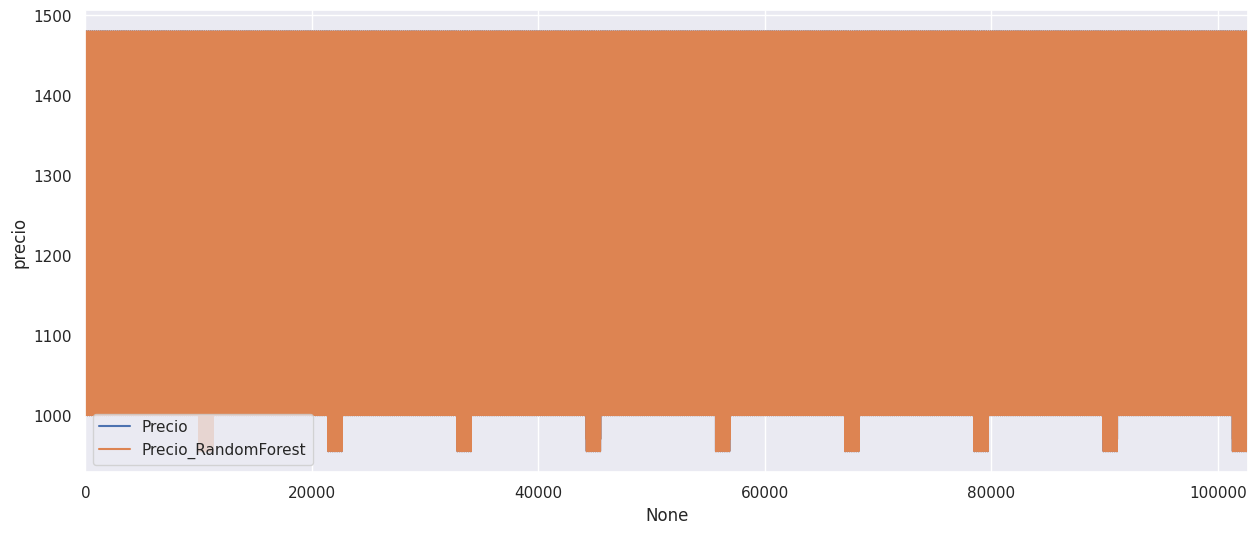

In [44]:
plt.figure(figsize=(15, 6))
sns.set(style='darkgrid')
sns.lineplot(data=df, x=df.index, y='precio', label='Precio')
sns.lineplot(data=df, x=df.index, y='precio_lr', label='Precio_RandomForest')
plt.xlim(0, len(df)) #ajustará el eje x para mostrar todos los puntos de datos.
#plt.xlim(inicio_x, fin_x)  # Ajusta 'inicio_x' y 'fin_x' a tus necesidades
plt.show()

#Evaluando el modelo con datos que no vio el modelo
** son las últimas filas que no estaban en el train del model

Verificar: objetos scaler, pca y model --> que esten creados y entrenados.

##Nuevos datos a predecir

In [45]:
#me quedo con las filas que no estan en el entrenamiento
rows_a_eliminar = datos.index[:-40]
datos_a_predecir = datos.drop(rows_a_eliminar)
#y elimino las columnas que no necesito
datos_a_predecir=datos_a_predecir.drop(['dia','mes','ano'],axis=1)
datos_a_predecir.head(3)

,precio,uva,decena_1,decena_2,decena_3,tri_1,tri_2,tri_3,tri_4
102641,1160,1201.59,0,1,0,0,0,0,1
102642,1160,1201.59,0,1,0,0,0,0,1
102643,1160,1201.59,0,1,0,0,0,0,1


In [46]:
df_predict = datos_a_predecir.drop('precio', axis=1)
precios_datos = datos_a_predecir['precio']


##Calculo

In [47]:
def predecir_precio(df_predict, scaler, pca, model):

    # Escalar los nuevos datos
    nuevos_datos_scaled = scaler.transform(df_predict)

    # Transformar los datos escalados usando PCA
    nuevos_datos_pca = pca.transform(nuevos_datos_scaled)

    # Predecir el precio
    precio_predicho = model.predict(nuevos_datos_pca)

    return precio_predicho

In [48]:
# Llamar a la función para predecir el precio
precio_predicho = predecir_precio(df_predict, scaler, pca, model)

# Imprimir el precio predicho
print(f"El precio predicho es: {precio_predicho}")

El precio predicho es: [1160.         1160.         1160.         1170.         1215.
 1200.         1200.         1205.         1205.         1205.
 1220.         1225.         1210.         1195.         1195.
 1195.         1195.         1205.         1205.         1200.
 1160.         1170.         1170.         1170.         1170.
 1115.         1115.         1115.         1100.         1115.
 1115.         1115.         1115.         1119.81622056 1119.81622056
 1119.81622056 1119.81622056 1115.         1115.         1110.        ]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


##Resultados

In [49]:
df_predict['precio_real']=datos_a_predecir['precio']
df_predict['precio_predicho']=precio_predicho
df_predict['diferencia_abs']=abs(df_predict['precio_real']-df_predict['precio_predicho'])
df_predict

,uva,decena_1,decena_2,decena_3,tri_1,tri_2,tri_3,tri_4,precio_real,precio_predicho,diferencia_abs
102641,1201.59,0,1,0,0,0,0,1,1160,1160.000000,0.000000
102642,1201.59,0,1,0,0,0,0,1,1160,1160.000000,0.000000
102643,1201.59,0,1,0,0,0,0,1,1160,1160.000000,0.000000
102644,1208.20,0,1,0,0,0,0,1,1170,1170.000000,0.000000
102645,1209.85,0,1,0,0,0,0,1,1215,1215.000000,0.000000
102646,1211.20,0,1,0,0,0,0,1,1200,1200.000000,0.000000
102647,1212.54,0,1,0,0,0,0,1,1200,1200.000000,0.000000
102648,1213.89,0,1,0,0,0,0,1,1205,1205.000000,0.000000
102649,1213.89,0,1,0,0,0,0,1,1205,1205.000000,0.000000
102650,1213.89,0,0,1,0,0,0,1,1205,1205.000000,0.000000


##Metricas

In [50]:
a=max_error(df_predict['precio_real'], df_predict['precio_predicho'])
b=mean_absolute_error(df_predict['precio_real'], df_predict['precio_predicho'])
c=mean_squared_error(df_predict['precio_real'], df_predict['precio_predicho'])
d=mean_squared_error(df_predict['precio_real'], df_predict['precio_predicho'],squared=False) #rmse
print(a,b,c,d)

4.816220557485622 0.13418897212571892 0.582432627720495 0.7631727377995725


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#Datos futuros a saber

In [51]:
datos_futuro = [[1279.17,0, 1, 0, 0, 0, 0, 1]] #ejemplo con valor uva del banco central fecha 10/12/24 -->array([1120.])

In [52]:
predecir_precio(datos_futuro, scaler, pca, model)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([1115.])

#Tiempo del proceso
Utilizamos test_counter

In [53]:
final=perf_counter()
print(final-inicio)

276.54434628700005
